In [ ]:
# Transferencia de aprendizaje / Transfer Learning

In [ ]:
# Crear nuestro propio conjunto de datos
!unzip rostros_hombres/rostros_hombres.zip -d rostros_hombres

Archive:  rostros_hombres/rostros_hombres.zip
  inflating: rostros_hombres/images209.jpg  
  inflating: rostros_hombres/images210.jpg  
  inflating: rostros_hombres/images211.jpg  
  inflating: rostros_hombres/7dcabe92370fff0c6489aba65af5dab2.jpg  
  inflating: rostros_hombres/35ac9c015db34e00079300895f8855b1.jpg  
  inflating: rostros_hombres/77d0561b10a9e4b145b836a3440b87ba.jpg  
  inflating: rostros_hombres/0981d203789363e9326b2ab19c955eb0.jpg  
  inflating: rostros_hombres/986.jpg  
  inflating: rostros_hombres/6499bc9d46fb8c6e72202ab0553e6603.jpg  
  inflating: rostros_hombres/71263896-hombres-cara-de-la-sonrisa-concepto-expresiC3B3n-retrato.jpg  
  inflating: rostros_hombres/76309178-retrato-de-hombre-cara-expresiC3B3n-seria.jpg  
  inflating: rostros_hombres/ada-de-un-hombre-joven-y-atractiva-caras-mC3A1s-than100-de-esta-colecciC3B3n.jpg  
  inflating: rostros_hombres/AdobeStock_221150952-U30834880027PMF--620x349abc.jpg  
  inflating: rostros_hombres/as-foto-cabeza-hombre-guapo-

In [ ]:
!unzip rostros_mujeres/rostros_mujeres.zip -d rostros_mujeres

Archive:  rostros_mujeres/rostros_mujeres.zip
  inflating: rostros_mujeres/una-ia-cambia-de-genero-a-los-jsi-fueran-mujeres.jpeg  
  inflating: rostros_mujeres/valeria-lukyanova-barbie-humana-cara-verdadero-rostro-real1.png  
  inflating: rostros_mujeres/1_618.jpeg  
  inflating: rostros_mujeres/5fa916010d80e.png  
  inflating: rostros_mujeres/8c1042846cfac160350c52d9bc537b88.jpg  
  inflating: rostros_mujeres/12b236a7a62b1a8aa8cf839886dff356.jpg  
  inflating: rostros_mujeres/0050_016.jpg  
  inflating: rostros_mujeres/63ae1771588a3.jpeg  
  inflating: rostros_mujeres/81gzEonYJS._AC_UF10001000_QL80_.jpg  
  inflating: rostros_mujeres/2114-934x.jpg  
  inflating: rostros_mujeres/277506-whatsapp-20image-202021-11-08-20at-2020-31-36.jpeg  
  inflating: rostros_mujeres/782149edb4c3f92b6055b79994946fca.jpg  
  inflating: rostros_mujeres/31002391-mujer-joven-y-bonita-real-en-suC3A9ter-y-bufanda-por-toda-la-cara-sonriente.jpg  
  inflating: rostros_mujeres/65425486-real-negro-mujer-africana-

In [ ]:
!rm -rf rostros_hombres/rostros_hombres.zip
!rm -rf rostros_mujeres/rostros_mujeres.zip

In [ ]:
# Crear set de datos (ya no en memoria)
!mkdir dataset
!cp -r rostros_hombres dataset/rostros_hombres # De la carpeta rostros_hombres a la carpeta dataset/rostros_hombres
!cp -r rostros_mujeres dataset/rostros_mujeres # Idem

In [ ]:
# Aumento de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Crear el dataset generador
datagen = ImageDataGenerator(
    rescale = 1. / 255, # Cambiar las imágenes para que sean normalizadas dividiéndolas en 255px.
    rotation_range = 10, # Rota aleatoriamente las imágenes.
    width_shift_range = 0.15, # Mueve en el ancho hacia la izq. o derecha.
    height_shift_range = 0.15, # Mueve en el alto hacia arriba o abajo.
    shear_range = 5, # Para que las deforme un poco.
    zoom_range = [0.7, 1.3], # Lista con dos valores: Mínimo acercamiento y Máximo acercamiento.
    validation_split = 0.2, # Validación: el 20% de las imágenes serán utilizadas para las pruebas.
)

# Set de Datos de Entrenamiento
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', # Ubicación del set de datos
                                                     target_size = (224,224), # Tamaño que queremos de las imag.
                                                     batch_size = 32, # Tamaño del lote.
                                                     shuffle = True, # Para mezclarlas constantemente
                                                     subset = 'training') # Entrenamiento -> 'training'
# Set de Datos de Prueba: toma un 20%
data_gen_pruebas = datagen.flow_from_directory('/content/dataset',
                                                     target_size = (224,224),
                                                     batch_size = 32,
                                                     shuffle = True,
                                                     subset = 'validation')


Found 302 images belonging to 2 classes.
Found 74 images belonging to 2 classes.


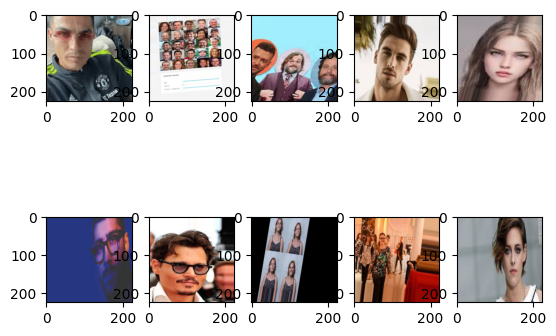

In [ ]:
# Ver graficamente como quedaron transformadas las imágenes
import matplotlib.pyplot as plt

for imagenes , etiquetas in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1) # (2filas,5columnas,i+1)
    plt.imshow(imagenes[i])
  break

plt.show() # Mostrar


In [ ]:
# Vamos a la 'Transferencia de Aprendizaje'
import tensorflow as tf
import tensorflow_hub as hub # Sitio donde ya existen modelos de Machine Learning, ya entrenados.

url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
mobilenetv2 = hub.KerasLayer(url, input_shape=(224 ,224, 3)) # (url, forma en que espera las imgs.224x224 y 3 (RGB - Color))

In [ ]:
# Importante!
# Congelar las capas
mobilenetv2.trinable = False # Que no se pueda entrenar, porque ya lo está, por eso, congelamos pesos y sesgos.

In [ ]:
# Creamos Modelo
modelo = tf.keras.Sequential([
    mobilenetv2, # Variable de entrada
    tf.keras.layers.Dense(units=2 , activation='softmax') # 2 neuronas(units): rostros-hombre y rostros-mujeres
])

In [ ]:
# Compliar Modelo
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Entrenar Modelo
EPOCAS = 50
entrenamiento = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data = data_gen_pruebas
)

Epoch 1/50
10/10 [==============================] - 6s 624ms/step - loss: 0.1205 - accuracy: 0.9603 - val_loss: 0.0984 - val_accuracy: 0.9459
Epoch 2/50
10/10 [==============================] - 7s 678ms/step - loss: 0.0771 - accuracy: 0.9768 - val_loss: 0.0939 - val_accuracy: 0.9730
Epoch 3/50
10/10 [==============================] - 5s 514ms/step - loss: 0.0984 - accuracy: 0.9702 - val_loss: 0.1093 - val_accuracy: 0.9730
Epoch 4/50
10/10 [==============================] - 6s 650ms/step - loss: 0.1047 - accuracy: 0.9636 - val_loss: 0.0921 - val_accuracy: 1.0000
Epoch 5/50
10/10 [==============================] - 5s 558ms/step - loss: 0.1046 - accuracy: 0.9603 - val_loss: 0.2085 - val_accuracy: 0.9324
Epoch 6/50
10/10 [==============================] - 6s 644ms/step - loss: 0.0907 - accuracy: 0.9669 - val_loss: 0.1119 - val_accuracy: 0.9595
Epoch 7/50
10/10 [==============================] - 5s 499ms/step - loss: 0.0833 - accuracy: 0.9768 - val_loss: 0.0718 - val_accuracy: 1.0000
Epoch 

In [ ]:
from PIL import Image
import cv2

def categorizar(ruta):
  img = Image.open(ruta) # Ubicación de la imagen
  img = img.convert('RGB') # Convertirla a RGB
  img = np.array(img).astype(float) / 255 # Convertirla en un array de numpy de tipo float y normalizarla 0 - 1

  img = cv2.resize(img,(224,224)) # Redimensionarla adaptándola a 224px x 224px, es el tamaño que espera el modelo
                                  # señalado anteriormente

  prediccion = modelo.predict(img.reshape(-1,224,224,3)) # Cambiar la estructura del arreglo
  return np.argmax(prediccion[0], axis=-1) # Va a retornar 0 o 1

In [ ]:
img_prediccion = 'hombre.jpg'
prediccion = categorizar(img_prediccion)

if prediccion == 0:
  print('Es rostro de hombre')
else:
  print('Es un rosto de mujer')

1/1 [==============================] - 1s 946ms/step
Es rostro de hombre


In [ ]:
img_prediccion = 'mujer.jpg'
prediccion = categorizar(img_prediccion)

if prediccion == 0:
  print('Es rostro de hombre')
else:
  print('Es un rosto de mujer')

1/1 [==============================] - 0s 33ms/step
Es un rosto de mujer


In [ ]:
img_prediccion = 'fatima_florez.png'
prediccion = categorizar(img_prediccion)

if prediccion == 0:
  print('Es rostro de hombre')
else:
  print('Es un rosto de mujer')

1/1 [==============================] - 0s 49ms/step
Es un rosto de mujer
